In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [5]:
yf.pdr_override() 
f = pdr.get_data_yahoo("BRK-B",start="2010-01-01", end="2019-12-09")
print(f)
f.reset_index(level=0, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   66.000000   66.500000   65.919998   66.220001   66.220001   
2010-01-05   66.389999   66.589996   66.150002   66.540001   66.540001   
2010-01-06   66.500000   66.500000   66.199997   66.199997   66.199997   
2010-01-07   66.199997   66.510002   66.139999   66.459999   66.459999   
2010-01-08   66.480003   66.480003   66.300003   66.440002   66.440002   
...                ...         ...         ...         ...         ...   
2019-12-02  220.600006  221.380005  220.110001  220.330002  220.330002   
2019-12-03  218.820007  218.899994  216.399994  218.080002  218.080002   
2019-12-04  217.949997  218.880005  217.539993  218.399994  218.399994   
2019-12-05  218.990005  219.750000  218.050003  219.600006  219.600006   
2019-12-06  221.639999  223.000000  221.330

In [6]:
df= f[['Date','Adj Close']]

In [7]:
df.columns=['ds','y']

In [8]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [9]:
future = m.make_future_dataframe(periods=365)

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2860,2020-12-01,221.165420,202.491185,240.680707
2861,2020-12-02,221.199910,201.582672,241.238926
2862,2020-12-03,221.226726,202.134603,241.489677
2863,2020-12-04,221.234297,202.074323,240.946767
2864,2020-12-05,220.211756,201.388441,239.886946


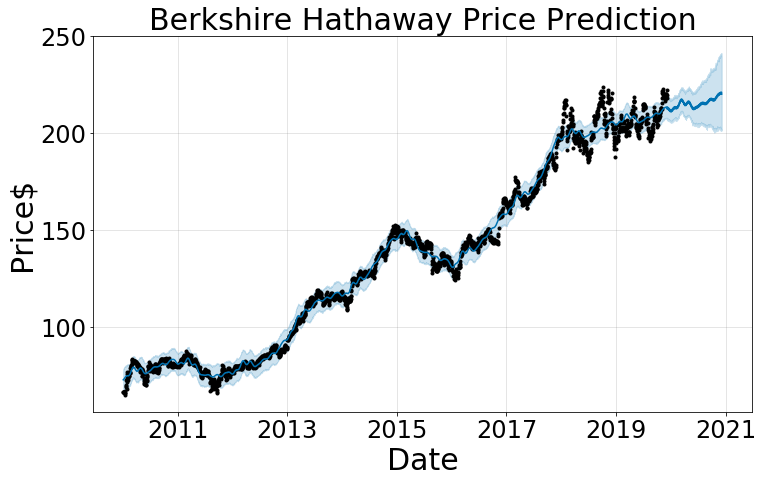

In [11]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price$')
ax = fig.gca()
ax.set_title("Berkshire Hathaway Price Prediction", size=30)
ax.set_xlabel("Date", size=30)
ax.set_ylabel("Price$", size=30)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)